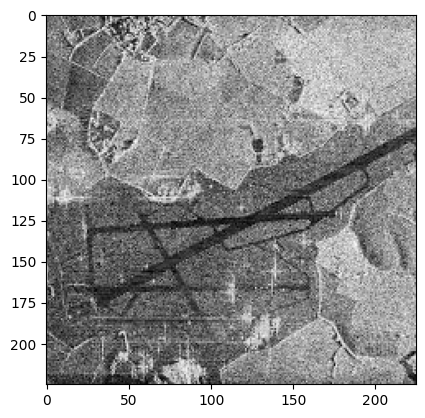

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity
import copy
import math

image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)

Длина самого протяженного участка дороги: 254.77 пикселей


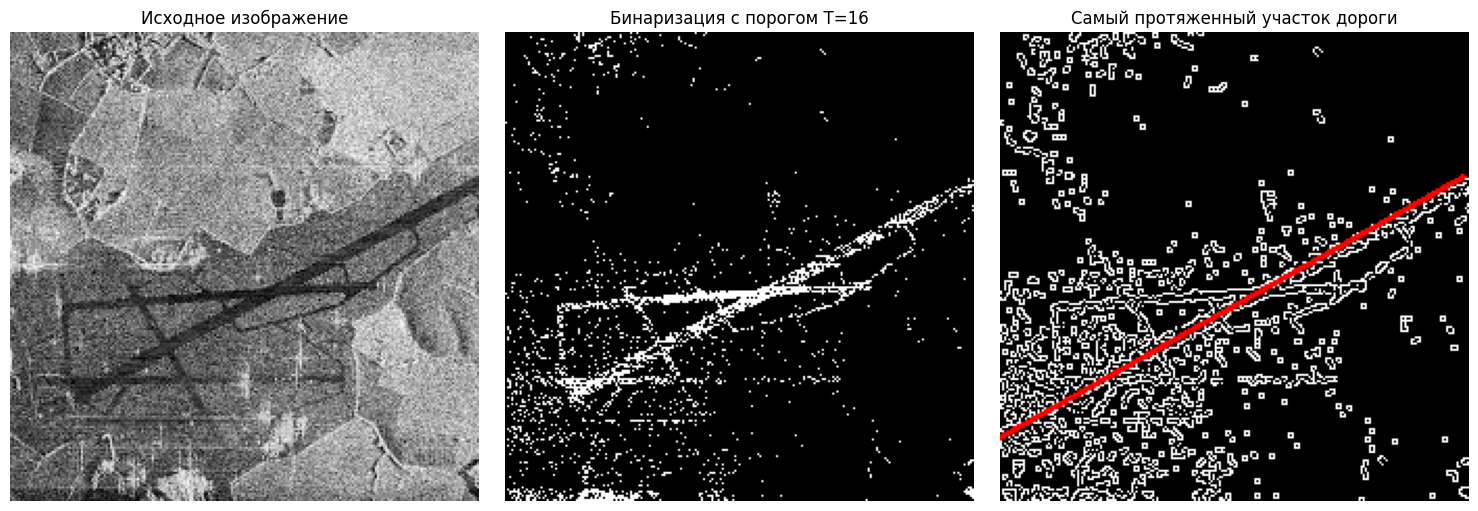

In [12]:
eq_gray = cv2.equalizeHist(image_gray)
T = 16
bin_img = np.zeros_like(eq_gray)
bin_img[eq_gray < T] = 0
bin_img[eq_gray >= T] = 255
bin_img = 255 - bin_img
edges = cv2.Canny(bin_img, 0, 1, apertureSize=5)
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/360,
    threshold=30,
    minLineLength=50,
    maxLineGap=10
)
image_with_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
longest_line = None
max_length = 0

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        if length > max_length:
            max_length = length
            longest_line = (x1, y1, x2, y2)
if longest_line is not None:
    cv2.line(image_with_lines, longest_line[:2], longest_line[2:], (0, 0, 255), 2)
    print(f"Длина самого протяженного участка дороги: {max_length:.2f} пикселей")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bin_img, cmap='gray')
plt.title('Бинаризация с порогом T=16')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Самый протяженный участок дороги')
plt.axis('off')

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

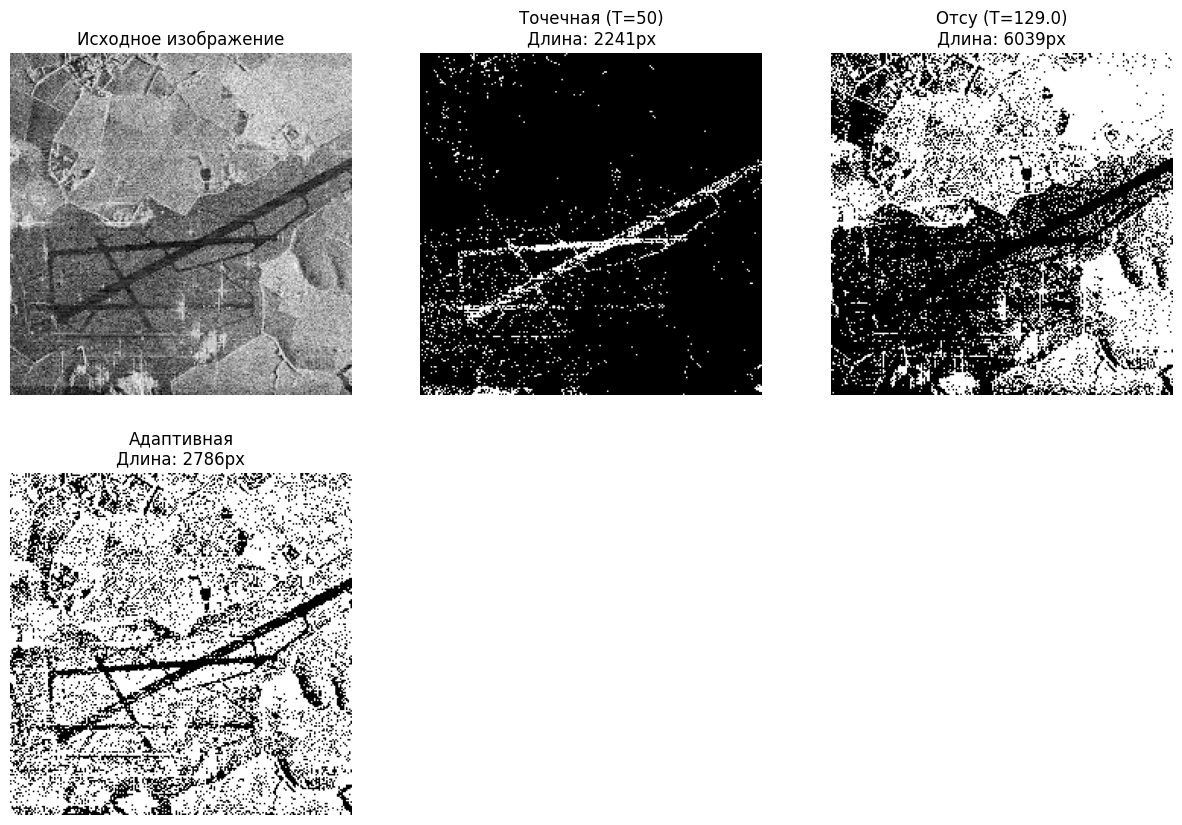

In [17]:
T = 50
bin_point = np.zeros_like(image_gray)
bin_point[image_gray < T] = 255
th_otsu, bin_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
bin_adaptive = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 71, 21)
def calculate_road_length(binary_image):
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_length = sum(cv2.arcLength(cnt, False) for cnt in contours)
    return total_length, contours
length_point, contours_point = calculate_road_length(bin_point)
length_otsu, contours_otsu = calculate_road_length(bin_otsu)
length_adaptive, contours_adaptive = calculate_road_length(bin_adaptive)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(image_rgb)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(bin_point, cmap='gray')
plt.title(f'Точечная (T={T})\nДлина: {length_point:.0f}px')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(bin_otsu, cmap='gray')
plt.title(f'Отсу (T={th_otsu:.1f})\nДлина: {length_otsu:.0f}px')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(bin_adaptive, cmap='gray')
plt.title(f'Адаптивная\nДлина: {length_adaptive:.0f}px')
plt.axis('off')